# Stock Prices Prediction Using Keras Long Term Short Memory

In [15]:
# Part 1 - Data Preprocessing

# Importing the libraries


ERROR: Could not find a version that satisfies the requirement subprocess (from versions: none)
ERROR: No matching distribution found for subprocess


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import random as rn
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler


#PART 1 - DATA PREPROCESSING

Seed = '2020'
os.environ['PYTHONHASHSEED'] = Seed
np.random.seed(int(Seed))
rn.seed(Seed)
tf.random.set_seed(int(Seed))

dataset_train = pd.read_csv('TSLA.csv')
dataset_train = dataset_train.loc[:871, :]
training_set = dataset_train.iloc[:, 1:2].values



sc = MinMaxScaler(feature_range = (0, 1)) 

training_set_scaled = sc.fit_transform(training_set)


In [2]:

#PART 2 - BUILDING THE MODEL

X_train = []
y_train = []
for i in range(25, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-25:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
len(X_train[2])
X_train.shape

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))


# Adding the output layer
regressor.add(Dense(units = 1)) 

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 150, batch_size = 48, validation_split=0.15, shuffle = False)

Epoch 1/150
15/15 [==============================] - 9s 217ms/step - loss: 0.0091 - val_loss: 0.1223
Epoch 2/150
15/15 [==============================] - 0s 27ms/step - loss: 0.0028 - val_loss: 0.0620
Epoch 3/150
15/15 [==============================] - 0s 27ms/step - loss: 8.5884e-04 - val_loss: 0.0704
Epoch 4/150
15/15 [==============================] - 0s 27ms/step - loss: 0.0011 - val_loss: 0.0396
Epoch 5/150
15/15 [==============================] - 0s 27ms/step - loss: 7.0874e-04 - val_loss: 0.0277
Epoch 6/150
15/15 [==============================] - 0s 27ms/step - loss: 6.8811e-04 - val_loss: 0.0193
Epoch 7/150
15/15 [==============================] - 0s 27ms/step - loss: 6.9246e-04 - val_loss: 0.0189
Epoch 8/150
15/15 [==============================] - 0s 27ms/step - loss: 6.9665e-04 - val_loss: 0.0234
Epoch 9/150
15/15 [==============================] - 0s 27ms/step - loss: 7.5579e-04 - val_loss: 0.0259
Epoch 10/150
15/15 [==============================] - 0s 27ms/step - loss: 

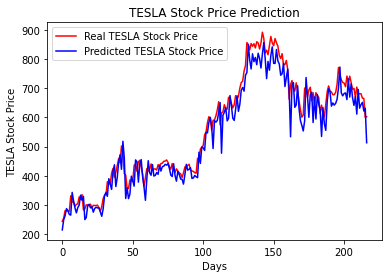

In [3]:
# PART 3 - MAKING THE PREDICTIONS AND VISUALIZING THE RESULTS

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 25:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(25, len(inputs)):
    X_test.append(inputs[i-25:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

plt.plot(real_stock_price, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [5]:
#PART 4 - GETTING MEAN PERCENTAGE OF ERROR

def getInfo():

    dataFrame = pd.DataFrame(columns = ['real', 'predicted', 'absDiff', 'PercDiff'])

    dataFrame['real'] = [i for j in real_stock_price for i in j]
    dataFrame['predicted'] = [i for j in predicted_stock_price for i in j]
    dataFrame['absDiff'] = abs(dataFrame['real'] - dataFrame['predicted'])
    dataFrame['PercDiff'] = dataFrame['absDiff']*100/dataFrame['real']

    print("Mean percentage of error +-" + str(dataFrame['PercDiff'].mean())+"%")


getInfo()

Mean percentage of error +-6.109077039618594%


(200.0, 700.0)

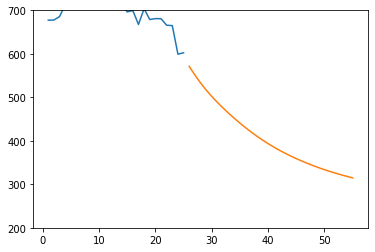

In [6]:
#PART 5 - PREDICTING FUTURE VALUE


dataset_test = pd.read_csv('tatatest.csv')
scaler=MinMaxScaler(feature_range=(0,1))
dataset_test = dataset_test.iloc[:, 1:2]
dataset_test=scaler.fit_transform(dataset_test).reshape(-1,1)

x_input = dataset_test[len(dataset_test)-25:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

output=[]
n_steps=25
i=0
while(i<30):

    if(len(temp_input)>25):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
#             print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
#             print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
#             print(yhat[0])
        temp_input.extend(yhat[0].tolist())
#             print(len(temp_input))
        output.extend(yhat.tolist())
        i=i+1


#     print(output)

print(" ")
day_new=np.arange(1,26)
day_pred=np.arange(26,56)



plt.plot(day_new,scaler.inverse_transform(dataset_test[192:]))
plt.plot(day_pred,scaler.inverse_transform(output))

plt.ylim([200,700])




In [3]:
# Importing the training set
dataset_train = pd.read_csv('TSLA.csv')
dataset_train = dataset_train.loc[:871, :]
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train)

          Date        Open        High         Low       Close   Adj Close  \
0    1/13/2017   46.000000   47.570000   45.917999   47.549999   47.549999   
1    1/17/2017   47.340000   47.992001   46.874001   47.116001   47.116001   
2    1/18/2017   47.330002   47.942001   47.116001   47.672001   47.672001   
3    1/19/2017   49.450001   49.736000   48.150002   48.751999   48.751999   
4    1/20/2017   49.091999   49.200001   48.602001   48.945999   48.945999   
..         ...         ...         ...         ...         ...         ...   
867  6/25/2020  190.854004  197.195999  187.429993  197.195999  197.195999   
868  6/26/2020  198.955994  199.000000  190.973999  191.947998  191.947998   
869  6/29/2020  193.802002  202.000000  189.703995  201.869995  201.869995   
870  6/30/2020  201.300003  217.537994  200.746002  215.962006  215.962006   
871   7/1/2020  216.600006  227.065994  216.100006  223.925995  223.925995   

         Volume  
0    30465000.0  
1    23087500.0  
2    1884

In [7]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))


In [12]:
# Adding the output layer
regressor.add(Dense(units = 1)) #Try change this

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 150, batch_size = 48, validation_split=0.15, shuffle = False)



Epoch 1/150
15/15 [==============================] - 7s 182ms/step - loss: 0.0091 - val_loss: 0.1223
Epoch 2/150
15/15 [==============================] - 0s 27ms/step - loss: 0.0028 - val_loss: 0.0620
Epoch 3/150
15/15 [==============================] - 0s 26ms/step - loss: 8.5884e-04 - val_loss: 0.0704
Epoch 4/150
15/15 [==============================] - 0s 27ms/step - loss: 0.0011 - val_loss: 0.0396
Epoch 5/150
15/15 [==============================] - 0s 27ms/step - loss: 7.0874e-04 - val_loss: 0.0277
Epoch 6/150
15/15 [==============================] - 0s 27ms/step - loss: 6.8811e-04 - val_loss: 0.0193
Epoch 7/150
15/15 [==============================] - 0s 29ms/step - loss: 6.9246e-04 - val_loss: 0.0189
Epoch 8/150
15/15 [==============================] - 0s 27ms/step - loss: 6.9665e-04 - val_loss: 0.0234
Epoch 9/150
15/15 [==============================] - 0s 28ms/step - loss: 7.5579e-04 - val_loss: 0.0259
Epoch 10/150
15/15 [==============================] - 0s 29ms/step - loss: 

In [13]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

inputs = dataset_total[len(dataset_total) - len(dataset_test) - 25:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(25, len(inputs)):
    X_test.append(inputs[i-25:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


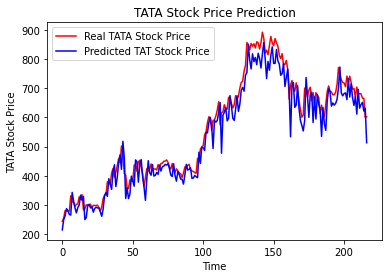

In [15]:
plt.plot(real_stock_price, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

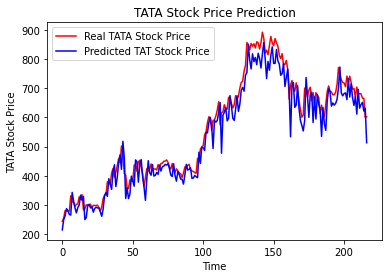

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

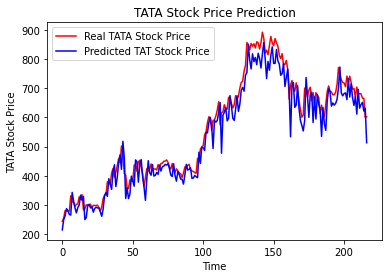

In [17]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [18]:
def getInfo():
    
    dataFrame = pd.DataFrame(columns = ['real', 'predicted', 'absDiff', 'PercDiff'])
    
    dataFrame['real'] = [i for j in real_stock_price for i in j]
    dataFrame['predicted'] = [i for j in predicted_stock_price for i in j]
    dataFrame['absDiff'] = abs(dataFrame['real'] - dataFrame['predicted'])
    dataFrame['PercDiff'] = dataFrame['absDiff']*100/dataFrame['real']
    
    print("Mean percentage of error +-" + str(dataFrame['PercDiff'].mean())+"%")
    
    
getInfo()

Mean percentage of error +-6.109077039618594%


array([[244.296005],
       [255.337997],
       [281.002014],
       [281.      ],
       [279.39801 ],
       [279.200012],
       [331.799988],
       [311.200012],
       [308.600006],
       [295.432007],
       [302.690002],
       [303.802002],
       [327.985992],
       [319.799988],
       [335.790009],
       [283.201996],
       [287.      ],
       [300.799988],
       [300.200012],
       [297.600006],
       [303.      ],
       [289.839996],
       [299.002014],
       [298.597992],
       [298.165985],
       [299.90799 ],
       [289.600006],
       [279.200012],
       [294.      ],
       [322.200012],
       [332.997986],
       [335.399994],
       [379.798004],
       [373.      ],
       [372.135986],
       [408.951996],
       [425.256012],
       [394.977997],
       [412.      ],
       [436.09201 ],
       [459.023987],
       [444.609985],
       [502.140015],
       [478.98999 ],
       [407.230011],
       [402.809998],
       [356.      ],
       [356.6

In [65]:
dataset_test = pd.read_csv('tatatest.csv')
scaler=MinMaxScaler(feature_range=(0,1))
dataset_test = dataset_test.iloc[:, 1:2]
dataset_test=scaler.fit_transform(dataset_test).reshape(-1,1)

x_input = dataset_test[len(dataset_test)-25:].reshape(1,-1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

output=[]
n_steps=25
i=0
while(i<30):
    
    if(len(temp_input)>25):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)


day_new=np.arange(1,26)
day_pred=np.arange(26,56)



plt.plot(day_new,scaler.inverse_transform(dataset_test[192:]))
plt.plot(day_pred,scaler.inverse_transform(output))

plt.ylim([200,700])
    

(1, 25)

In [66]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()
temp_input

[0.6692855950695736,
 0.6698883220725594,
 0.6821432874248167,
 0.7238689366450107,
 0.8135018127476495,
 0.7708488712439189,
 0.7485179961179694,
 0.7345321024781944,
 0.7311631534700288,
 0.7116139712927535,
 0.7683762772684847,
 0.7348411999060401,
 0.7676035800607032,
 0.7319977267248147,
 0.6986944013451114,
 0.7034851812129491,
 0.6541562177398915,
 0.7101148892570363,
 0.6716964057216684,
 0.6749726357010836,
 0.6745090359211477,
 0.6513899014656522,
 0.6499991021258448,
 0.5485284522565851,
 0.553550984107164]

In [70]:
output=[]
n_steps=25
i=0
while(i<30):
    
    if(len(temp_input)>25):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = regressor.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = regressor.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)
    

0 day input [0.68214329 0.72386894 0.81350181 0.77084887 0.748518   0.7345321
 0.73116315 0.71161397 0.76837628 0.7348412  0.76760358 0.73199773
 0.6986944  0.70348518 0.65415622 0.71011489 0.67169641 0.67497264
 0.67450904 0.6513899  0.6499991  0.54852845 0.55355098 0.50523764
 0.47491342]
0 day output [[0.44664907]]
1 day input [0.72386894 0.81350181 0.77084887 0.748518   0.7345321  0.73116315
 0.71161397 0.76837628 0.7348412  0.76760358 0.73199773 0.6986944
 0.70348518 0.65415622 0.71011489 0.67169641 0.67497264 0.67450904
 0.6513899  0.6499991  0.54852845 0.55355098 0.50523764 0.47491342
 0.44664907]
1 day output [[0.42133257]]
2 day input [0.81350181 0.77084887 0.748518   0.7345321  0.73116315 0.71161397
 0.76837628 0.7348412  0.76760358 0.73199773 0.6986944  0.70348518
 0.65415622 0.71011489 0.67169641 0.67497264 0.67450904 0.6513899
 0.6499991  0.54852845 0.55355098 0.50523764 0.47491342 0.44664907
 0.42133257]
2 day output [[0.39839405]]
3 day input [0.77084887 0.748518   0.734

28 day output [[0.104073]]
29 day input [0.357373   0.33854914 0.32060778 0.30349866 0.28722468 0.27180034
 0.25724077 0.24353889 0.23067385 0.21860829 0.20729327 0.19667949
 0.18671165 0.17734343 0.1685299  0.16023222 0.15241671 0.14505187
 0.13811171 0.13157019 0.12540416 0.11959162 0.11411181 0.10894512
 0.104073  ]
29 day output [[0.09947797]]
[[0.44664907455444336], [0.42133256793022156], [0.39839404821395874], [0.37722519040107727], [0.3573729991912842], [0.3385491371154785], [0.3206077814102173], [0.30349865555763245], [0.287224680185318], [0.27180033922195435], [0.25724077224731445], [0.24353888630867004], [0.23067384958267212], [0.2186082899570465], [0.20729327201843262], [0.19667948782444], [0.1867116540670395], [0.1773434281349182], [0.16852989792823792], [0.16023221611976624], [0.15241670608520508], [0.14505186676979065], [0.13811171054840088], [0.13157019019126892], [0.12540416419506073], [0.119591623544693], [0.11411181092262268], [0.10894511640071869], [0.104072995483875

In [74]:
len(dataset_test)

217

(200.0, 700.0)

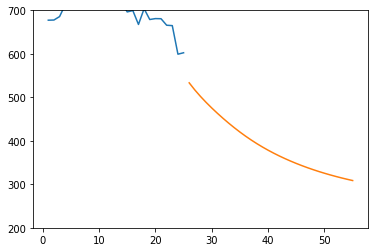

In [81]:
day_new=np.arange(1,26)
day_pred=np.arange(26,56)



plt.plot(day_new,scaler.inverse_transform(dataset_test[192:]))
plt.plot(day_pred,scaler.inverse_transform(output))

plt.ylim([200,700])